In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def mysine(t, amp, freq, phi):
    "Solves the sine wave equation"
    return amp* np.sin(2*np.pi*freq*t + phi)

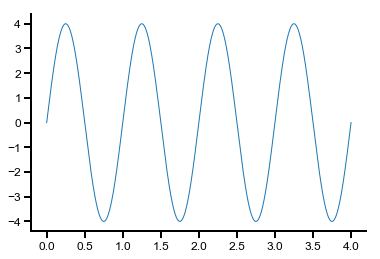

In [3]:
dt = 1/30000 # sampling interval in sec
t = np.arange(0,4, dt)
myparams = dict(amp = 4, freq = 1, phi = 0)

y = mysine(t, **myparams)

plt.plot(t, y)

<H2>Complex sine waves</H2>

Complex sine waves have an imaginary part (sine) and a real part (cosine).

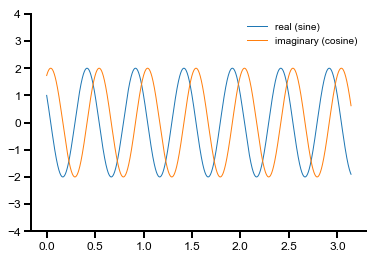

In [9]:
freq = 2 # in Hz
phi = np.pi/3
amp = 2
t = np.arange(0,np.pi, 1/30000)

k = 2*np.pi*freq*t + phi
cwv = amp * np.exp(1j* k) # complex sine wave

plt.plot(t, np.real(cwv), label='real (sine)')
plt.plot(t, np.imag(cwv), label ='imaginary (cosine)')
plt.ylim(-4,4)
plt.legend(frameon=False)

(Text(0.5, 0, 'Time (s)'),
 Text(0.5, 0, 'Real part'),
 Text(0.5, 0, 'Imaginary part'))

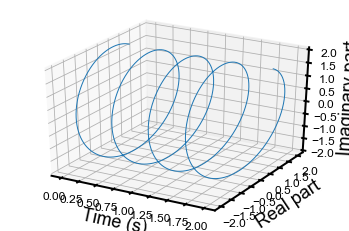

In [5]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
fig = plt.figure()
ax = fig.gca(projection ='3d')
ax.plot(t, cwv.real, cwv.imag)
ax.set_xlabel('Time (s)'), ax.set_ylabel('Real part'), ax.set_zlabel('Imaginary part')

If you try to compute the Fourier transform with only real-valued sines or only real-valued cosines, you will end up with a result 
that depends on the phase offset between the sine wave and the signal.

That would mean that if you shift your signal by, let's say, 10 milliseconds, the resulting Fourier spectrum would be different
even thought the signal hasn't changed.

<H2>Dot product of sine waves</H2>

Text(3, 7.5, '240000.0000')

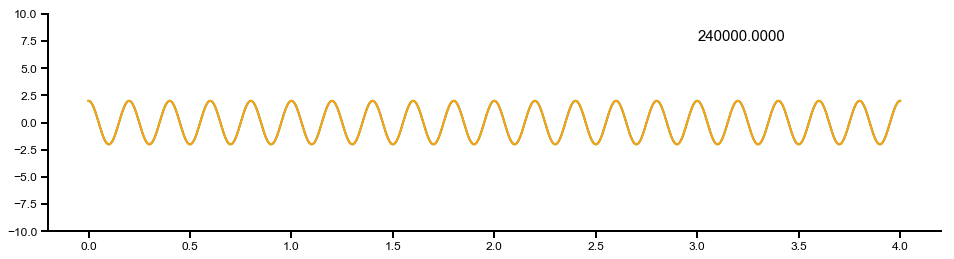

In [6]:
dt = 1/30000 # sampling interval in sec
t = np.arange(0,4, dt)

myparams1 = dict(amp = 2, freq = 5, phi = np.pi/2)
myparams2 = dict(amp = 2, freq = 5, phi = np.pi/2)


sinew1 = mysine(t, **myparams1)
sinew2 = mysine(t, **myparams2)
fig, ax = plt.subplots(1,1, figsize=(16,4))

ax.plot(t, sinew1, lw = 2)
ax.plot(t, sinew2, color='orange', lw=2)
ax.set_ylim(-10,10)
ax.text(3, 7.5, '{:2.4f}'.format(np.dot(sinew1, sinew2)), fontsize=15)

Same amplitudes and phases, but different frequencies yields to zero. Only when the steps are one or 0.5. It is 
because of the sampling rate.

The same frequency but phases differe by PI over two yields zero.

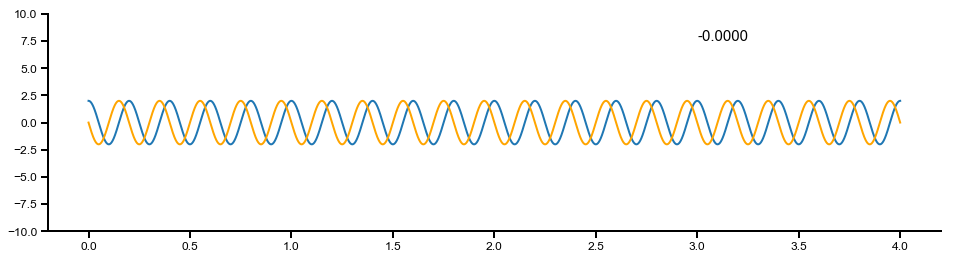

In [7]:
# 
myparams1 = dict(amp = 2, freq = 5, phi = np.pi/2)
myparams2 = dict(amp = 2, freq = 5, phi = 2*np.pi/2) # ortogonal


sinew1 = mysine(t, **myparams1)
sinew2 = mysine(t, **myparams2)
fig, ax = plt.subplots(1,1, figsize=(16,4))

ax.plot(t, sinew1, lw = 2)
ax.plot(t, sinew2, color='orange', lw=2)
ax.set_ylim(-10,10)
ax.text(3, 7.5, '{:2.4f}'.format(np.dot(sinew1, sinew2)), fontsize=15);

Text(0, 0.5, 'Dot product')

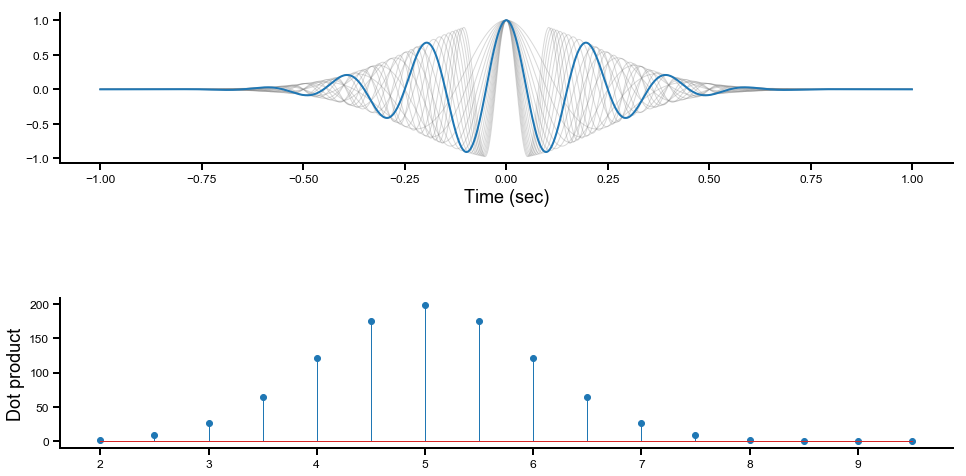

In [34]:
t = np.arange(-1., 1., 1/1000.)
theta = 2*np.pi/4

morlet = lambda f : np.sin(2*np.pi*f*t + theta) * np.exp( (-t**2)/ 0.1) # Gaussian is exp(-t^2/stdev)
signal = morlet(5)

fval = np.arange(2,10,0.5)


fig, ax = plt.subplots(2,1, figsize=(16,8))

dotlist = list()
for i in fval:
    dotlist.append(np.dot(signal,morlet(i)))
    ax[0].plot(t, morlet(i), color='gray', alpha=.3)

ax[0].plot(t, signal, lw = 2)
ax[0].set_xlabel('Time (sec)')
ax[1].stem(fval, dotlist)
ax[1].set_ylabel('Dot product')

<h2>Complex dot product</H2>